# Exchange rates and GDP growth

In [455]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
import pandas_datareader as pddr
from matplotlib_venn import venn2
import numpy as np
from matplotlib.ticker import MaxNLocator

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import dataproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Importing and cleaning data

## Exchange rate data

In [456]:
#the data of exchange rates is loaded
er = pd.read_excel('VALUTAKURSER.xls', skiprows=3, index_col=0)

#dropping unused columns and choosing appropriate time frame
er.drop(er.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
er.drop(['2019'], axis=1, inplace=True)

#renaming column
er.rename(columns = {'Country Code':'Country_Code'}, inplace=True)

#printing modified data
er.head(264)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Aruba,ABW,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,...,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000,1.790000
Afghanistan,AFG,46.619531,47.357575,47.500015,47.263000,48.762754,47.845312,49.494597,49.925331,49.962018,...,50.325000,46.452461,46.747008,50.921400,55.377500,57.247500,61.143462,67.866086,68.026904,72.083247
Angola,AGO,2.790706,10.040544,22.057862,43.530207,74.606301,83.541363,87.159142,80.368072,76.706143,...,79.328167,91.905720,93.934750,95.467955,96.518279,98.302417,120.060702,163.656434,165.915951,252.855748
Albania,ALB,137.690583,143.709417,143.484833,140.154516,121.863250,102.780051,99.870254,98.103377,90.427894,...,94.978120,103.936667,100.895833,108.184167,105.669167,105.480000,125.961667,124.142500,119.100000,107.989167
Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,XKX,NaN,NaN,NaN,1.062552,0.886034,0.805365,0.804120,0.797141,0.730638,...,0.719843,0.755045,0.719355,0.778294,0.753159,0.753731,0.901659,0.904035,0.887397,0.847186
"Yemen, Rep.",YEM,155.718333,161.718333,168.671667,175.625000,183.448333,184.775833,191.509167,197.049167,198.953333,...,202.846667,219.590000,213.800000,214.350833,214.890000,214.890000,214.890000,214.890000,214.890000,214.890000
South Africa,ZAF,6.109484,6.939828,8.609181,10.540747,7.564749,6.459693,6.359328,6.771549,7.045365,...,8.473674,7.321222,7.261132,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926


In [457]:
#choosing selected countries
c_list = ['Brazil','China', 'Euro area', 'United Kingdom', 'India', 'Japan', 'South Africa', 'Russian Federation', 'United States']
er2 = er.loc[c_list,]

#printing cleaned data
er2.head(9)

,Country_Code,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country Name,,,,,,,,,,,,,,,,,,,,,
Brazil,BRA,1.813933,1.829423,2.349632,2.920363,3.077475,2.925119,2.434390,2.175327,1.947058,...,1.999428,1.759227,1.672829,1.953069,2.156089,2.352952,3.326904,3.491313,3.191389,3.653825
China,CHN,8.278250,8.278504,8.277068,8.276957,8.277037,8.276801,8.194317,7.973438,7.607532,...,6.831416,6.770269,6.461461,6.312333,6.195758,6.143434,6.227489,6.644478,6.758755,6.615957
Euro area,EMU,0.938283,1.082705,1.116533,1.057559,0.884048,0.803922,0.803800,0.796433,0.729672,...,0.716958,0.754309,0.718414,0.778338,0.752945,0.752728,0.901296,0.903421,0.885206,0.846773
United Kingdom,GBR,0.618057,0.660931,0.694655,0.667223,0.612472,0.546180,0.549998,0.543487,0.499772,...,0.641919,0.647179,0.624141,0.633047,0.639661,0.607730,0.654545,0.740634,0.776977,0.749532
India,IND,43.055428,44.941605,47.186414,48.610319,46.583284,45.316467,44.099975,45.307008,41.348533,...,48.405267,45.725812,46.670467,53.437233,58.597845,61.029514,64.151944,67.195313,65.121569,68.389467
Japan,JPN,113.906805,107.765498,121.528948,125.388019,115.933464,108.192569,110.218212,116.299312,117.753529,...,93.570089,87.779875,79.807020,79.790455,97.595658,105.944781,121.044026,108.792900,112.166141,110.423179
South Africa,ZAF,6.109484,6.939828,8.609181,10.540747,7.564749,6.459693,6.359328,6.771549,7.045365,...,8.473674,7.321222,7.261132,8.209969,9.655056,10.852656,12.758931,14.709611,13.323801,13.233926
Russian Federation,RUS,24.619900,28.129167,29.168525,31.348483,30.692025,28.813742,28.284442,27.190958,25.580845,...,31.740358,30.367915,29.382341,30.839831,31.837144,38.378207,60.937650,67.055933,58.342801,62.668133
United States,USA,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [458]:
#columns are renamed to include a stubname
mydick = {str(i):f'Exchange_rate{i}' for i in range(1999,2019)}
er2.rename(columns = mydick, inplace=True)

#cleaned data is converted to long format to enable easier user with pandas
er2_long = pd.wide_to_long(er2, stubnames = 'Exchange_rate', i='Country_Code', j='year').reset_index()

#the long format is displayed
er2_long.head(180)

,Country_Code,year,Exchange_rate
0,BRA,1999,1.813933
1,CHN,1999,8.278250
2,EMU,1999,0.938283
3,GBR,1999,0.618057
4,IND,1999,43.055428
...,...,...,...
175,IND,2018,68.389467
176,JPN,2018,110.423179
177,ZAF,2018,13.233926
178,RUS,2018,62.668133


## GDP growth data

In [459]:
#the data of GDP growth is loaded
gdpg = pd.read_excel('BNPVÆKST.xls', skiprows=3, index_col=0)

#dropping unused columns and choosing appropriate time frame
gdpg.drop(gdpg.loc[:, 'Indicator Name':'1998'].columns, axis = 1, inplace=True)
gdpg.drop(['2019'], axis=1, inplace=True)

#renaming column
gdpg.rename(columns = {'Country Code':'Country_Code'}, inplace=True)

#implementing our chosen countries in the GDP data
gdpg2 = gdpg.loc[c_list,]

#printing cleaned data
gdpg2.head(9)

#columns are renamed to include a stubname
gdpg2.rename(columns = {str(i):f'GDP_growth{i}' for i in range(1999,2019)}, inplace=True)

#cleaned data is converted to long format to enable easier user with pandas
gdpg2_long = pd.wide_to_long(gdpg2, stubnames='GDP_growth', i='Country_Code', j='year').reset_index()

#long format data is printed
gdpg2_long.head(1000)

,Country_Code,year,GDP_growth
0,BRA,1999,0.467938
1,CHN,1999,7.667486
2,EMU,1999,2.975615
3,GBR,1999,3.428223
4,IND,1999,8.845756
...,...,...,...
175,IND,2018,6.811369
176,JPN,2018,0.788456
177,ZAF,2018,0.787056
178,RUS,2018,2.254804


## Explore data set

In [460]:
#a function is defined to decide variables for plot
def plot_er_gdpg(er2,gdpg2,dataset, Country_Code): 
    
    #An if-statement is made differentiate between either exchange rate or GDP growth
    if dataset == 'Exchange_rate':
        df = er2
        y = 'Exchange_rate'
    else:
        df = gdpg2
        y = 'GDP_growth'
    
    I = df['Country_Code'] == Country_Code
    #the x-values are set to be the years while the y-values takes on either GDP or exchange rate
    ax = df.loc[I,:].plot(x='year', y=y, style='-')
    #We ensure that the x-axis values are integers
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))


The **interactive plot** is:

In [461]:
#an interactive figure is made
widgets.interact(plot_er_gdpg, 
    #the widgets are constructed in order to choose between the different countries as well as exchange rate or GDP growth
    er2 = widgets.fixed(er2_long),
    gdpg2 = widgets.fixed(gdpg2_long),
    dataset = widgets.Dropdown(description='Dataset', 
                               options=['Exchange_rate','GDP_growth']),
    Country_Code = widgets.Dropdown(description='Country_Code',
                 options=er2_long.Country_Code.unique())
); 

plt.show()

interactive(children=(Dropdown(description='Dataset', options=('Exchange_rate', 'GDP_growth'), value='Exchange…

The exchange rate is measured against the USD. This is why the US exchange rate appears to be constant.

In [462]:
#A single country is chosen show correlation between exchange rates and GDP
#The data is extracted
JPN_G = gdpg2_long.loc[gdpg2_long['Country_Code'] == 'JPN', :]
JPN_E = er2_long.loc[er2_long['Country_Code'] == 'JPN', :]

#The Japanese exchange rate and GDP growth are merged
mergedJPN = pd.merge(JPN_G, JPN_E, how='inner',on=['Country_Code','year'])


mergedJPN.head(1000)

,Country_Code,year,GDP_growth,Exchange_rate
0,JPN,1999,-0.251954,113.906805
1,JPN,2000,2.779633,107.765498
2,JPN,2001,0.406336,121.528948
3,JPN,2002,0.117993,125.388019
4,JPN,2003,1.528220,115.933464
5,JPN,2004,2.204688,108.192569
6,JPN,2005,1.662670,110.218212
7,JPN,2006,1.420007,116.299312
8,JPN,2007,1.654184,117.753529
9,JPN,2008,-1.093541,103.359494


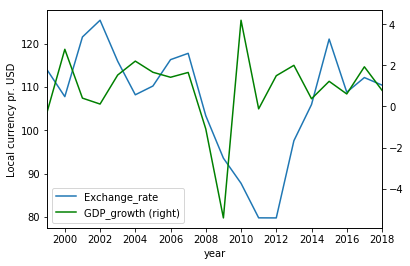

In [495]:
#A plot of the Japanese exchange rate as well as GDP growth in percent is made
ax=plt.gca()

mergedJPN.plot(x='year', y='Exchange_rate', ax=ax)
mergedJPN.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))



# Merge data sets

In [523]:
#data from all countries is merged
merged = pd.merge(er2_long, gdpg2_long, how='inner',on=['Country_Code','year'])

print(f'Number of countries = {len(merged.Country_Code.unique())}')
print(f'Number of years          = {len(merged.year.unique())}')


#the merged data is printed
merged.head(1000)

Number of countries = 9
Number of years          = 20


,Country_Code,year,Exchange_rate,GDP_growth
0,BRA,1999,1.813933,0.467938
1,CHN,1999,8.278250,7.667486
2,EMU,1999,0.938283,2.975615
3,GBR,1999,0.618057,3.428223
4,IND,1999,43.055428,8.845756
...,...,...,...,...
175,IND,2018,68.389467,6.811369
176,JPN,2018,110.423179,0.788456
177,ZAF,2018,13.233926,0.787056
178,RUS,2018,62.668133,2.254804


In [509]:
mergedEMU = merged.loc[merged['Country_Code'] == 'EMU', :]
mergedEMU.head(100)



,Country_Code,year,Exchange_rate,GDP_growth
2,EMU,1999,0.938283,2.975615
11,EMU,2000,1.082705,3.862611
20,EMU,2001,1.116533,2.211878
29,EMU,2002,1.057559,0.956401
38,EMU,2003,0.884048,0.698720
47,EMU,2004,0.803922,2.303660
56,EMU,2005,0.803800,1.685575
65,EMU,2006,0.796433,3.226905
74,EMU,2007,0.729672,2.997519
83,EMU,2008,0.679923,0.421095


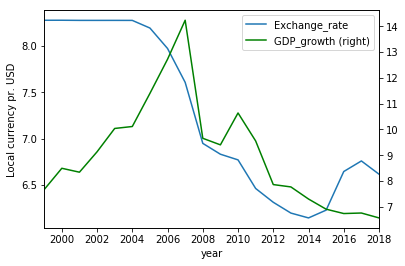

In [510]:
mergedCHN = merged.loc[merged['Country_Code'] == 'CHN', :]

ax=plt.gca()

mergedCHN.plot(x='year', y='Exchange_rate', ax=ax)
mergedCHN.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

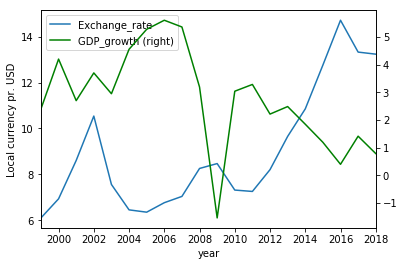

In [522]:
mergedZAF = merged.loc[merged['Country_Code'] == 'ZAF', :]

ax=plt.gca()

mergedZAF.plot(x='year', y='Exchange_rate', ax=ax)
mergedZAF.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

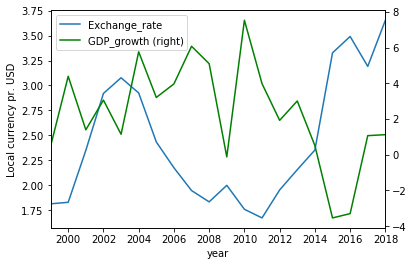

In [519]:
mergedBRA = merged.loc[merged['Country_Code'] == 'BRA', :]

ax=plt.gca()

mergedBRA.plot(x='year', y='Exchange_rate', ax=ax)
mergedBRA.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))


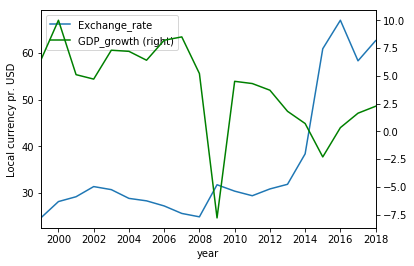

In [520]:
mergedRUS = merged.loc[merged['Country_Code'] == 'RUS', :]

ax=plt.gca()

mergedRUS.plot(x='year', y='Exchange_rate', ax=ax)
mergedRUS.plot(x='year', y='GDP_growth', ax=ax, secondary_y=True, style='g')
ax.set_ylabel("Local currency pr. USD")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

# Analysis

To get a quick overview of the data, we show some **summary statistics by year**:

In [488]:
mergedmean = merged.groupby('Country_Code').agg(['mean']).round(2)

mergedmean.drop(['year'], axis=1, inplace=True)

mergedmean.head(10)

,Exchange_rate,GDP_growth
,mean,mean
Country_Code,,
BRA,2.44,2.33
CHN,7.27,9.06
EMU,0.85,1.47
GBR,0.63,1.95
IND,51.43,6.74
JPN,106.86,0.88
RUS,36.01,3.91
USA,1.00,2.21


# Conclusion

ADD CONCISE CONLUSION.